<a href="https://colab.research.google.com/github/JoJuML/world-population-by-country-2020/blob/main/world_population_by_country_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***THIS COLAB IS AN ADAPTACION OF GIT: "world-population-by-country-2020
"***

you must download the archive "world-population-by-country-2020.csv
" from the original git within the file "archivos" and upload on this colab

**this is the archive read_csv.py**

In [7]:
import csv

def read_csv(path):
  with open(path, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    data = []
    for row in reader:
      iterable = zip(header, row)
      country_dict = {key: value for key, value in iterable}
      data.append(country_dict)
    return data

**this is the archive utils.py**

In [8]:
def get_population(country_dict):
  population_dict = {
    '2022': int(country_dict['2022 Population']),
    '2020': int(country_dict['2020 Population']),
    '2015': int(country_dict['2015 Population']),
    '2010': int(country_dict['2010 Population']),
    '2000': int(country_dict['2000 Population']),
    '1990': int(country_dict['1990 Population']),
    '1980': int(country_dict['1980 Population']),
    '1970': int(country_dict['1970 Population'])
  }
  labels = population_dict.keys()
  values = population_dict.values()
  return labels, values


def population_by_country(data, country):
  result = list(filter(lambda item: item['Country (or dependency)'] == country, data))
  return result

**this is the archive world-population-by-country-2020.py**

escribe algún país: ireland
Ireland DEBAJO DE LA ESPECTATIVA DE POBLACION: incremento neto 55291 incremento estimado 55796 diferencia -505


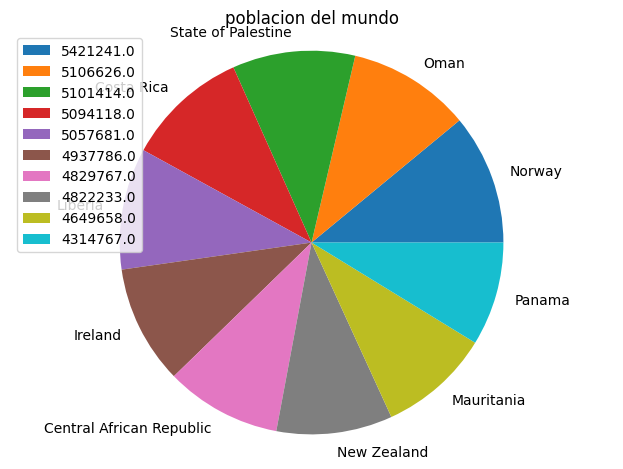

In [10]:
import matplotlib.pyplot as plt
'''
# this modules are not necesary on this colab version
from utils import population_by_country
from read_csv import read_csv

este programa analiza el cambio de poblacion del pais elegido con
respecto al año pasado, asi como también mostrará la grafica de tarta
de la población mundial, comparando el pais elegido con paises similares
en poblacion
codigo hecho por: josé juan martínez lópez
'''

Data = read_csv('./world-population-by-country-2020.csv')


def graph_pie(Data,values,country):
    i = int(country['\ufeffno'])-1

    fig, ax = plt.subplots()
    ax.set_title('poblacion del mundo')
    val = values[i-5:i+5]
    dat = Data[i-5:i+5]
    if i < 5:
        val = values[0:9]
        dat = Data[0:9]
    elif i>229:
        val = values[224:234]
        dat = Data[224:234]

    ax.pie(val, labels = dat)
    ax.axis("equal")
    ax.legend(val)

    plt.tight_layout()
    plt.show()

def differentation(Data,country):
    popul = [float(i['Population 2020'].replace(',','')) for i in Data[:]]
    change = [i['Yearly Change'].replace('%','') for i in Data[:]]
    net = [int(i['Net Change'].replace(',','')) for i in Data[:]]

    change = [float(i)/100 for i in change]

    Change_stimated = []
    diff = []
    countries = []
    for i in range(0,len(popul)):
        Change_stimated.append(int(popul[i]*change[i]))
        diff.append(net[i]-Change_stimated[i])
        countries.append(Data[i]['Country (or dependency)'])
        neto = int(country['Net Change'].replace(',',''))

        if net[i] == neto and diff[i] < 0 :
            print(Data[i]['Country (or dependency)'],'DEBAJO DE LA ESPECTATIVA DE POBLACION: incremento neto'
                  ,net[i],'incremento estimado',Change_stimated[i],'diferencia',diff[i])
        elif net[i] == neto and diff[i] >= 0 :
            print(Data[i]['Country (or dependency)'],'ARRIBA DE LA ESPECTATIVA DE POBLACION: incremento neto'
                  ,net[i],'incremento estimado',Change_stimated[i],'diferencia',diff[i])
    return diff,Change_stimated,countries,popul


def main():
    pais = input('escribe algún país: ') #write any country:
    pais = pais.capitalize()
    country = population_by_country(Data,pais)


    values,changes,countries,popul = differentation(Data,country[0])
    graph_pie(countries,popul,country[0])
    #graph_pie(countries,changes)


if __name__=='__main__':
    main()